<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the book Machine Learning for OpenCV by Michael Beyeler; the content is available [on GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [Dealing with Data Using OpenCV's TrainData Container in C++](02.05-Dealing-with-Data-Using-the-OpenCV-TrainData-Container-in-C++.ipynb) | [Contents](../README.md) | [None](04.00-Representing-Data-and-Engineering-Features.ipynb) >

# Logistic Regression

Despite its name, logistic regression can actually be used as a model for classification. It uses a logistic function (or sigmoid) to convert any real-valued input x into an output y that takes values between 0 and 1.

Because the output is always between 0 and 1, it can be interpreted as a probability. That's the trick behind using the logistic function for classification.

## Logistic Regression in OpenCV

In [1]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

### Loading the dataset

The Iris dataset is included in Scikit-Learn's example datasets:

In [3]:
iris = datasets.load_iris()

Inspect the `iris` object:
- `DESCR`: Get a description of the data
- `data`: The actual data, <`num_samples` x `num_features`>
- `feature_names`: The names of the features
- `target`: The class labels, <`num_samples` x 1>
- `target_names`: The names of the class labels

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.target.shape

(150,)

In [8]:
np.unique(iris.target)

array([0, 1, 2])

### Making it a binary classification problem

For the sake of simplicity, we want to focus on a binary classification problem for now, where we only have two classes. The easiest way to do this is simply to discard all data points belonging to a certain class (such as class label 2), by selecting all rows that do not belong to class 2:

In [9]:
idx = iris.target != 2
data = iris.data[idx].astype(np.float32)
target = iris.target[idx].astype(np.float32)

### Inspecting the data

Before you get started with setting up a model, it is always a good idea to have a look at the data. We did this above for the town map example, so let's continue our streak. Using Matplotlib, we create a scatter plot where the color of each data point corresponds to the class label:

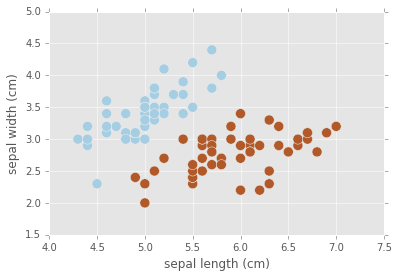

In [10]:
plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.Paired, s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### Splitting the data into training and test sets

We can easily split the data using one of Scikit-Learn's many helper functions. Here we want to split the data into 90% training data and 10% test data, which we specify with `test_size=0.1`:

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.1, random_state=42)

In [12]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [13]:
X_test.shape, y_test.shape

((10, 4), (10,))

### Training the classifier

Creating a logistic regression classifier involves pretty much the same steps as setting up k-NN:

In [14]:
lr = cv2.ml.LogisticRegression_create()

We then have to specify the desired training method. Here, we can choose from `cv2.ml.LogisticRegression_BATCH` and `cv2.ml.LogisticRegression_MINI_BATCH`:

In [15]:
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)
lr.setMiniBatchSize(1)

Set the number of iterations:

In [16]:
lr.setIterations(100)

In [17]:
lr.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

Retrieve the learned weights:

In [18]:
lr.get_learnt_thetas()

array([[-0.04109113, -0.01968078, -0.16216497,  0.28704911,  0.11945518]], dtype=float32)

Get the training score:

In [19]:
ret, y_pred = lr.predict(X_train)

In [20]:
metrics.accuracy_score(y_train, y_pred)

1.0

### Testing the classifier

Get the test score:

In [21]:
ret, y_pred = lr.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

<!--NAVIGATION-->
< [Dealing with Data Using OpenCV's TrainData Container in C++](02.05-Dealing-with-Data-Using-the-OpenCV-TrainData-Container-in-C++.ipynb) | [Contents](../README.md) | [None](04.00-Representing-Data-and-Engineering-Features.ipynb) >